In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

In [9]:
# Establish connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

student_perf = pd.read_sql_query('select * from studentsperformance', con=engine)

# Disconnect
engine.dispose()

In [10]:
student_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
student_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
student_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


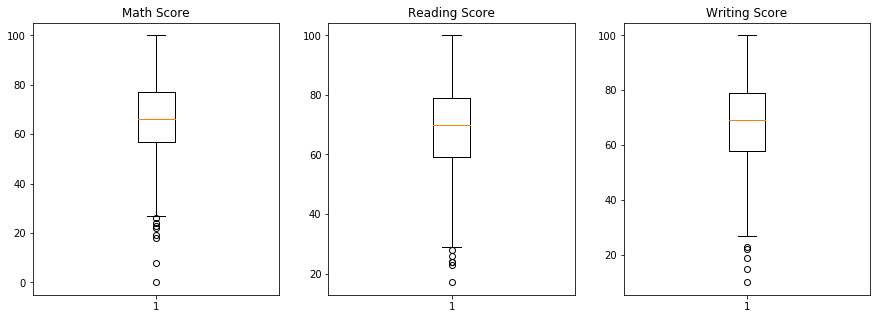

In [14]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(student_perf['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
plt.boxplot(student_perf['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
plt.boxplot(student_perf['writing score'])
plt.title('Writing Score')

plt.show()

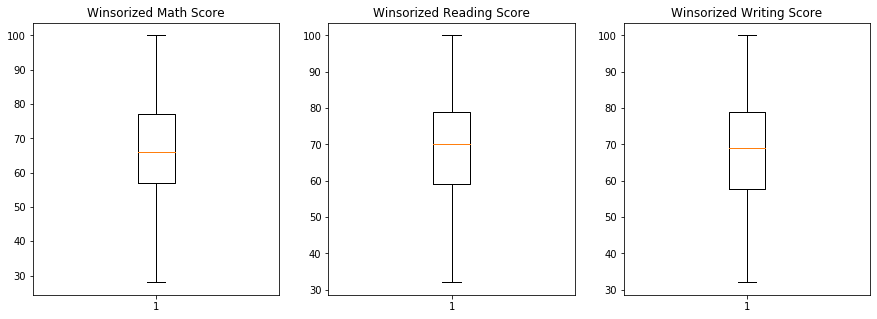

In [23]:
winsorized_math = winsorize(student_perf['math score'], (0.01, 0))
winsorized_reading = winsorize(student_perf['reading score'], (0.01, 0))
winsorized_writing = winsorize(student_perf['writing score'], (0.01, 0))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(winsorized_math)
plt.title('Winsorized Math Score')

plt.subplot(1, 3, 2)
plt.boxplot(winsorized_reading)
plt.title('Winsorized Reading Score')

plt.subplot(1, 3, 3)
plt.boxplot(winsorized_writing)
plt.title('Winsorized Writing Score')

plt.show()

### Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams? 

In [24]:
student_perf.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [25]:
student_perf.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [26]:
student_perf.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


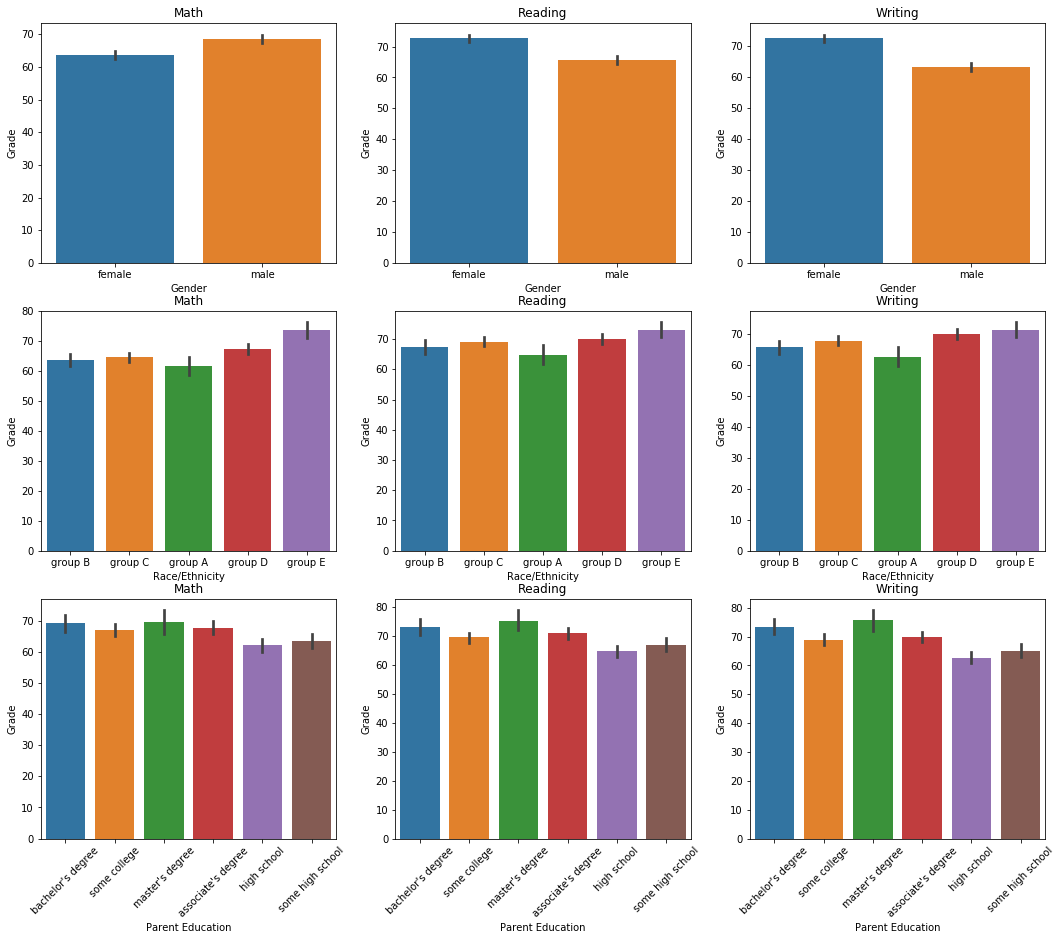

In [39]:
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
sns.barplot(student_perf['gender'], winsorized_math)
plt.title('Math')
plt.ylabel('Grade')
plt.xlabel('Gender')

plt.subplot(3, 3, 2)
sns.barplot(student_perf['gender'], winsorized_reading)
plt.title('Reading')
plt.ylabel('Grade')
plt.xlabel('Gender')

plt.subplot(3, 3, 3)
sns.barplot(student_perf['gender'], winsorized_writing)
plt.title('Writing')
plt.ylabel('Grade')
plt.xlabel('Gender')

plt.subplot(3, 3, 4)
sns.barplot(student_perf['race/ethnicity'], winsorized_math)
plt.title('Math')
plt.ylabel('Grade')
plt.xlabel('Race/Ethnicity')

plt.subplot(3, 3, 5)
sns.barplot(student_perf['race/ethnicity'], winsorized_reading)
plt.title('Reading')
plt.ylabel('Grade')
plt.xlabel('Race/Ethnicity')

plt.subplot(3, 3, 6)
sns.barplot(student_perf['race/ethnicity'], winsorized_writing)
plt.title('Writing')
plt.ylabel('Grade')
plt.xlabel('Race/Ethnicity')

plt.subplot(3, 3, 7)
sns.barplot(student_perf['parental level of education'], winsorized_math)
plt.title('Math')
plt.ylabel('Grade')
plt.xlabel('Parent Education')
plt.xticks(rotation=45)

plt.subplot(3, 3, 8)
sns.barplot(student_perf['parental level of education'], winsorized_reading)
plt.title('Reading')
plt.ylabel('Grade')
plt.xlabel('Parent Education')
plt.xticks(rotation=45)

plt.subplot(3, 3, 9)
sns.barplot(student_perf['parental level of education'], winsorized_writing)
plt.title('Writing')
plt.ylabel('Grade')
plt.xlabel('Parent Education')
plt.xticks(rotation=45)

plt.show()

### Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this? 

### Does the test preparation course seem to have an effect on the exam performances? 

### Which 2 exam scores are most correlated with each other? 